In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from functions import correct_luminance, sample_img, plot_slice
Image.MAX_IMAGE_PIXELS = None #default image size is 178956970 pixels

# Load in original image

In [ ]:
# read in image
img = Image.open('han.jpg')
# convert image as np.array
img = np.array(img)
# save np.array
np.save('large_ts.npy')

# Transform image

In [13]:
# load saved array
img_arr = np.load('large_ts.npy')
# print shape to make sure it is okay with 3 color channels
print(img_arr.shape)
# convert to greyscale and correct luminance
# returns a 2-dimensional np.array that can then be used for image sampling
new_img = correct_luminance(img_arr)

(52992, 33472, 3)


# Sample Image 

In [14]:
# Create a dataframe and sample the new image with sub-samples of
# dimensions height, width, and shift the window for sampling inc
df = sample_img(new_img, height=2000, width=2000, inc=2000)

26 rows and 16 columns to slice.
Total observations: 416


In [13]:
# save dataframe
df.to_pickle('img_slices.pkl')

# Start tracing grains on slices
* in terminal, navigate to folder containing orientations.py and config.py files
* change config.py file df variable to be correct dataframe
    * if this is the first time collecting data, df = 'img_slices.pkl'
    * if you are adding to previously collected data, df = 'orientations.pkl'
* make sure n_slice is correct value

In [2]:
# define dataframe and load file
df = pd.read_pickle('orientations.pkl')

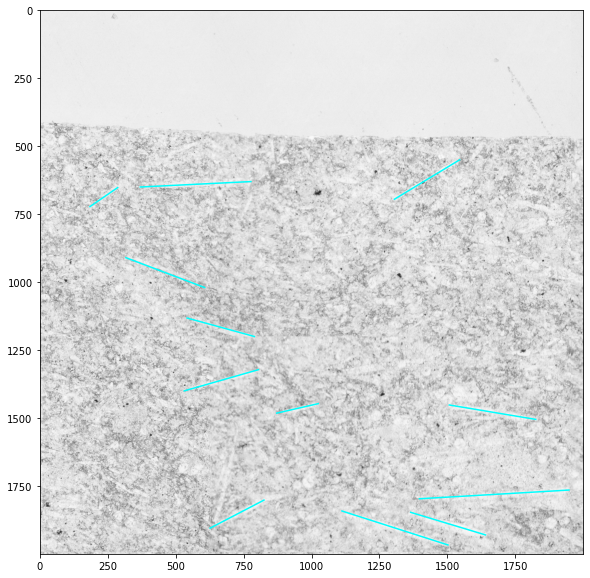

In [12]:
plot_slice(df, n_slice=5, color='cyan', annotate=True)


In [8]:
df.head(20)

,slice,points,topleft
0,"[[236.2852, 238.28519999999997, 239.2851999999...","[[[580, 1632], [757, 1672]], [[867, 1782], [98...","(0, 0)"
1,"[[235.78379999999999, 236.78379999999999, 242....","[[[1060, 1647], [1092, 1547]], [[1565, 1497], ...","(2000, 0)"
2,"[[241.0056, 240.07779999999997, 242.5712, 240....","[[[1407, 1572], [1620, 1540]]]","(4000, 0)"
3,"[[243.63939999999997, 241.6394, 243.6393999999...","[[[10, 1417], [132, 1497]], [[422, 1385], [492...","(6000, 0)"
4,"[[236.51219999999998, 239.44, 238.5122, 233.51...","[[[680, 742], [880, 645]], [[587, 515], [935, ...","(8000, 0)"
5,"[[236.51219999999998, 237.51219999999998, 238....","[[[1507, 1452], [1825, 1505]], [[1397, 1797], ...","(10000, 0)"
6,"[[228.8796, 231.87959999999998, 236.8796, 239....","[[[560, 1022], [740, 1137]], [[515, 1407], [70...","(12000, 0)"
7,"[[236.3088, 238.16439999999997, 232.3088, 229....","[[[677, 1502], [527, 1082]], [[947, 1155], [12...","(14000, 0)"
8,"[[225.326, 222.326, 220.326, 221.3259999999999...","[[[377, 1255], [477, 1560]], [[62, 1510], [135...","(16000, 0)"
9,"[[246.6418, 248.6418, 251.6418, 253.5695999999...",[],"(18000, 0)"


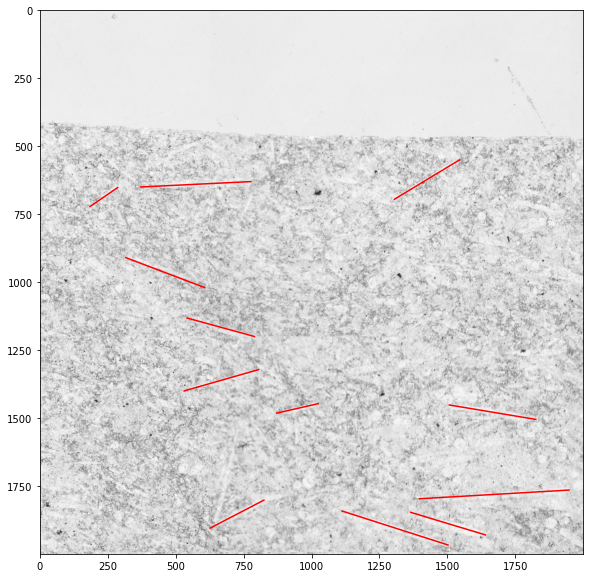

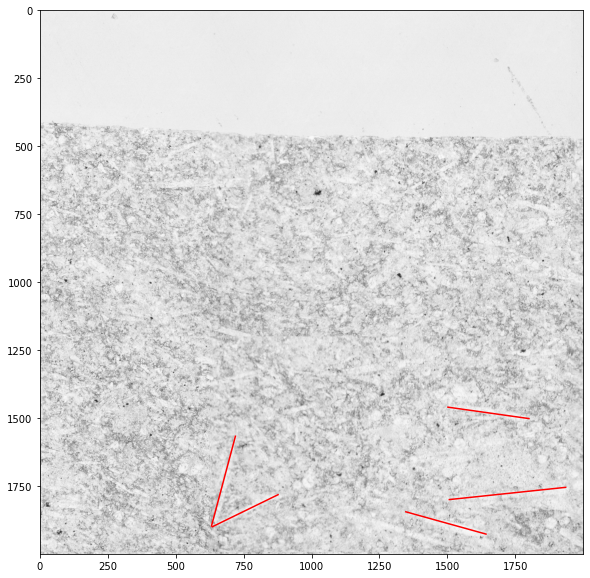

In [14]:
n_slice = 5

img = Image.fromarray(df['slice'][n_slice])
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

for pair in df['points'][n_slice]:
    plt.plot([pair[0][0], pair[1][0]],[pair[0][1], pair[1][1]], 'red')

In [4]:
# full_img = Image.fromarray(full_arr)
img = correct_luminance(full_arr)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

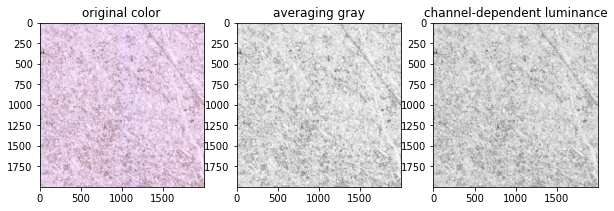

In [91]:
small_img = full_img.crop([3000, 3000]+[5000, 5000])
small_img = np.array(small_img)

plt.figure(figsize=(10,15))

plt.subplot(1,3,1)
plt.imshow(small_img)
plt.title('original color')

plt.subplot(1,3,2)
plt.imshow(np.mean(small_img, axis=2), cmap='gray')
plt.title('averaging gray')

plt.subplot(1,3,3)
plt.imshow(correct_luminance(small_img), cmap='gray')
plt.title('channel-dependent luminance')

plt.tight_layout